

# B4. Modelling for prediction of Solar Power generation

For the purpose of modelling the dataset for the prediction of solar irradiation, the timestamp, source key and plant ID were removed. The models used were-Decision Tree, Linear Regression and SVM regreesion. Only for modelling with Linear Regression, the Date variable was kept to visualise the change in variables with respect to date in order to plot the graphs.   

## B4.1 Decision Tree
First Decision Tree was used. It was giving a high accuracy, but was tuned further using hyper parameter tuning. The model with tuning and without tuning was compared and decision tree was visualised.

In [1]:
#importing all the libraries

import numpy as np # numpy array and performing algebraic operations
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #data visualisation and plots
import matplotlib.pyplot as plt #data visualisation and plots

In [3]:
new_data = pd.read_csv('C:/Users/win/Desktop/FinalCode/dataset/new_data_LR.csv')
new_data.head()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,TIME,DATE
0,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0,0:00:00,15/05/2020
1,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0,0:00:00,15/05/2020
2,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0,0:00:00,15/05/2020
3,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0,0:00:00,15/05/2020
4,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0,0:00:00,15/05/2020


In [4]:
new_data.keys()

Index(['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD',
       'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'TIME',
       'DATE'],
      dtype='object')

### B4.1.1 Selecting the features for Modelling

In [5]:
X = new_data[['DC_POWER', 'AC_POWER', 'DAILY_YIELD',
       'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']]
y = new_data[['IRRADIATION']]

### B4.1.2 Building a Decision Tree Model for Regression

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=3)

In [7]:
X_train.shape

(36544, 6)

In [8]:
X_test.shape

(9136, 6)

In [9]:
y_train.shape

(36544, 1)

In [10]:
y_test.shape

(9136, 1)

### B4.1.3 Training the model to make a prediction


In [11]:
#-------Train with Decision Tree------------#

#import decision tree regressor
from sklearn.tree import DecisionTreeRegressor



In [12]:
#Instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1,random_state=3)

In [13]:
#Fit dt to the training set
dt.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

In [14]:
#Predict test-set labels
y_pred= dt.predict(X_test)

### B4.1.3 Evaluate the Model

In [15]:
#import mean squared error as MSE
from sklearn.metrics import mean_squared_error as MSE

In [16]:
#Compute test-set MSE
mse_dt=MSE(y_test,y_pred)

In [17]:
#Compute test-set RMSE
rmse_dt= mse_dt**(1/2)

In [18]:
#Print root mean square error of model
print(rmse_dt)

0.0699855604954722


### B4.1.4 Parameter Tunning


In [19]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
tuning_model=GridSearchCV(dt,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [22]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [23]:
%%capture
from datetime import datetime

start_time=timer(None)

tuning_model.fit(X,y)

timer(start_time)

In [24]:
# best hyperparameters 
tuning_model.best_params_


{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [25]:
# best model score
tuning_model.best_score_

-0.005688720586503437

### B4.1.5 Training Decision Tree With Best Hyperparameters

In [26]:
tuned_hyper_model=DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=10,min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter='best')

In [27]:
# fitting model


tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=10,
                      min_weight_fraction_leaf=0.1)

### B4.1.6 Prediction and calculate metrics

In [28]:
# prediction 

tuned_pred=tuned_hyper_model.predict(X_test)

### B4.1.7 Evaluate the model

In [29]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))


MAE: 0.040068089413185765
MSE: 0.004897978431094053
RMSE: 0.06998555873245603


In [30]:
# without hyperparameter tuning 

from sklearn import metrics
prediction=dt.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test,prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.04006830563914639
MSE: 0.004897978677865398
RMSE: 0.0699855604954722


<b>There is a difference in the mean square error in both the models. The hyperparameter tuned model has a lesser Mean Square Error meaning that it is a better model.</b> 

### B4.1.8 Visualise the tree

In [31]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

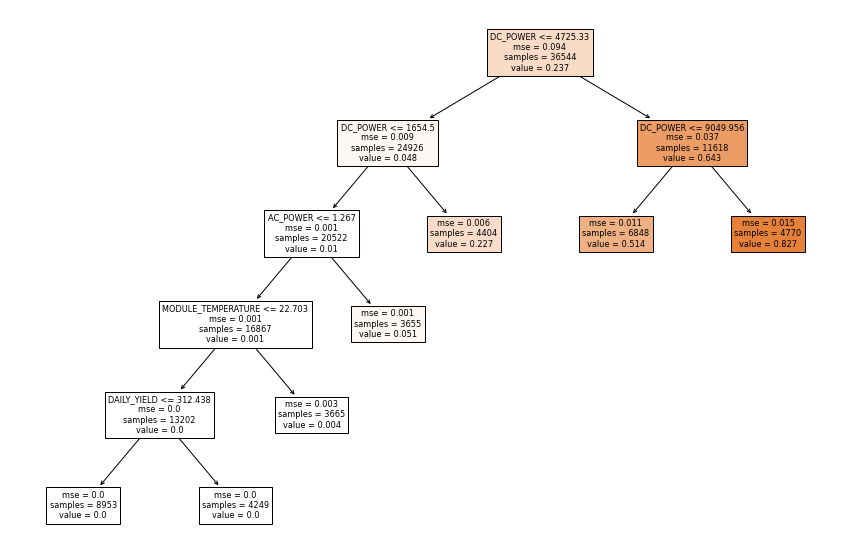

In [32]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(tuned_hyper_model,
filled=True,
feature_names=['DC_POWER', 'AC_POWER', 'DAILY_YIELD',
       'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE'],
class_names='IRRADIATION')

<b>The decision tree starts building itself from the first feature in the dataset which is the DC power. Based on the value of DC Power the tree branches out. The ideal branch for the model from this tree is:</b> 
    
Here if DC Power is less than 1654V then the value of AC power is checked. If DC power is more than 1654V the model predicts with an MSE of 0.037. 
    
If AC power is less than 1267V then the Module temperature is checked. If its not then the model predicts with MSE of 0.001
    
If the module temperature is less than 22 degree then Daily Yield is checked. If its not then model predicts with MSE of 0.003
    
If the Daily yield is less than 312KW then the model predicts with MSE tending to 0. 

## Save the Model

In [33]:
import pickle

In [34]:
filename='DTModel.pkl'

In [35]:
pickle.dump(dt,open(filename,'wb'))

## Load model from pickle

In [36]:
load_model=pickle.load(open(filename,'rb'))

## References

[1]Week 7 Tutorial Breast Cancer Detection from Decision Tree Model,university canvas site 